# Question 3

Write Python code to build a neural network with the following details. 

    - Input data = Iris dataset
    - Number of hidden layers = 1
    - Number of units in hidden layer = 5,10,15,20,25
    - Number of iterations = 5000
    - Learning rate = 0.0001
    - Learning algorithm = stochastic gradient descent
    - Activation = logistic 

1. Compare the training score for various hidden units. 
2. Plot the loss curve for various hidden units. 
3. Report execution time for various hidden units as a bar graph. (Use library time and time() method) 


## Expectations

1. Expected output: (approximately)
    - Training accuracy 5 is xx.xxx 
    - Training accuracy 10 is xx.xxx 
    - Training accuracy 15 is xx.xxx 
    - Training accuracy 20 is xx.xxx 
    - Training accuracy 25 is xx.xxx

2. Graph: Training Loss (Actual output may vary)
![title](images/op-hidden.png)

3. Bar graph: Execution Time (Actual output may vary)
![title](images/time-hidden.png)

You are expected to modify this notebook and upload the modified file as assignment submission.

<b> PS: Code written within the block will be evaluted. Other code will be ignored.
#### start code here
#### end code here

In [9]:
from sklearn import datasets  
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time

# Load Iris dataset.

iris = datasets.load_iris()

# Extract all columns except last from the dataset for X values.
# y is the target column.

X = iris["data"][:,:-1]  
y = iris["target"]

# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)

# normalise the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Use the library function sklearn.neural_network.MLPClassifier 

# Build neural network for various hidden units. (max 10 lines of code) Use loop.

# start code here

from sklearn.neural_network import MLPClassifier

Hidden_Layer_Units = np.array([5, 10, 15, 20, 25])
Execution_Time = []
MLP_Classifiers = []


for i in Hidden_Layer_Units:
    start_time = time.time()
    clf = MLPClassifier(activation='logistic', solver='sgd',
                    hidden_layer_sizes=(i,), learning_rate='constant', learning_rate_init=0.0001, max_iter=5000, early_stopping = False)
    clf.fit(X_train, y_train)
    Execution_Time.append(time.time() - start_time)
    MLP_Classifiers.append(clf)
    
# end code here

In [11]:
# Compare the training  score for various hidden units. (max 2 lines of code) Use loop.

# start code here

for clf, i in zip(MLP_Classifiers, Hidden_Layer_Units) :
    print ("Accuracy on training score ", i," is ", clf.score(X_train, y_train))
    
# end code here

Accuracy on training score  5  is  0.3142857142857143
Accuracy on training score  10  is  0.3333333333333333
Accuracy on training score  15  is  0.3333333333333333
Accuracy on training score  20  is  0.3333333333333333
Accuracy on training score  25  is  0.5142857142857142


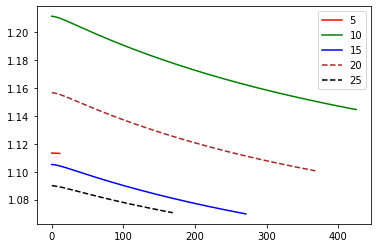

In [12]:
# Plot the loss curve for various hidden units. (max 5 lines of code) Use loop.

# start code here

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'brown', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '--'}]

for clf, labels, args in zip(MLP_Classifiers, ["5", "10","15", "20", "25"], plot_args) :
        plt.plot(clf.loss_curve_, label=labels, **args)
plt.legend(loc='best')
plt.show()
    
# end code here

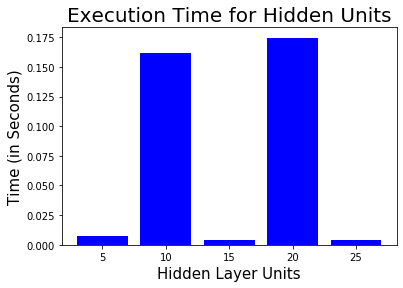

In [5]:
# Plot the execution time as bar graph. (max 5 lines of code)

# start code here

plt.bar(Hidden_Layer_Units, Execution_Time, width=4, color = 'blue')
plt.xlabel('Hidden Layer Units', fontsize=15)
plt.ylabel('Time (in Seconds)', fontsize=15)
plt.title("Execution Time for Hidden Units", fontsize=20)
plt.show()

# end code here